> This notebook is me trying to follow the explanations provided by Mr. Samson in his video: [Samson's Video](https://www.youtube.com/watch?v=w8yWXqWQYmU) <br>
>Here, I'll try to make it as precise as I can. 

## Understanding the maths behind Neural Network by building from scratch (Just NumPy)

### Problem Statement
* DataSets from [Kaggle's Digit Recognizer Dataset](https://www.kaggle.com/competitions/digit-recognizer/data)
* It contains $28 \times 28$ grayscale images of handwritten digits
* Each image is accompanied by a label from **0 to 9**.
* **Task**: Build a network that predicts what digit is written.

### Neural Network Overview

<div style="text-align:center">
    <img src="./Notebook_images/NN_diagram_overview.png" alt="NN Overview">
</div>


#### Input Layer:
* Input image is $28\times28$ pixels which is equals to $784$ pixels and we insert that into out input layers. Hence, resulting in $784$nodes.
* Here, each pixel has a value between **0 to 255**; *0 being Black* and *255 being White*.
* Now, we need to normalize these values. So, in order to normalize, we *divide the pixels value by the max_pixel value before feeding it to the network* ie., $${Normalized\_Value} = \frac{{pixel\_value}}{255}$$ 

#### Hidden Layer:
* Could have any number of nodes but to make it simple, choose $10$ nodes.
* The value of each of these nodes is calculated based on weights and biases applied to the value of the $784$ nodes in the input layer. After this calculation, a ReLU activation is applied to all nodes in the layer.
* For simplicity just using One Hidden Layer.

#### Output Layer:
* The output layer too has $10$ nodes. **Reason: Corresponds to each digit from 0 to 9**
* The value of each of these nodes will again be calculated from weights and biases applied to the value of the $10$ nodes in the hidden layer, with a softmax activation applied to them to get the final output.

### Slight Notes related to Forward and Backward Propagation:
#### Forward Prop: 
* Forward Propagation simply is a process of taking an image and running through the Neural Network to get a prediction
* The prediction made from the given image depends on the *weights and biases* of the network.
#### Backprop:
* In backprop, we take previously made prediction, calculate the error of how off it was from actual value, then run this error backwards through the NN to find out how much each weight and bias parameter contributed to this error.
* **Gradient_descent is carried out using backprop.**
* The basic idea of gradient descent is to figure out what direction each parameter can go in to decrease error by the greatest amount, then nudge each parameter in its corresponding direction over and over again until the parameters for minimum error and highest accuracy are found. 

### Maths

#### Representing the data

Each training example is represented by a 784-element vector, corresponding to the image's pixels. These vectors can be stacked into a matrix for vectorized calculations, allowing error computation for all examples simultaneously with matrix operations.

In machine learning, it's common to stack these vectors as rows in a matrix with dimensions $m×n$, where $m$ is the number of training examples and $n$ is the number of features ($784$ in this case). To simplify calculations, we'll transpose this matrix to have dimensions $n×m$, with each column representing a training example and each row representing a feature.

$$X= \begin{bmatrix}
x^{(1)}\\ x^{(2)}\\ .\\ .\\ x^{(m)}\\ 
\end{bmatrix}^T = \begin{bmatrix}
 x^{(1)}& x^{(2)} & . &  .&  x^{(m)}& 
\end{bmatrix}$$

#### Representing weights and biases

In a neural network, weights are represented as a matrix of dimensions $n^{[l]} \times n^{[l-1]}$, where $n^{[l-1]}$ is the number of nodes in the previous layer and $n^{[l]}$ is the number of nodes in the current layer. For example, $W^{[1]}$ is a $10 \times 784$ matrix, and $W^{[2]}$ is a $10 \times 10$ matrix. Biases are constant terms added to each node of the following layer and are represented as matrices with dimensions $n^{[l]} \times 1$, so both $b^{[1]}$ and $b^{[2]}$ have dimensions $10 \times 1$.

#### Forward Propagation

Forward propagation in a neural network involves calculating the unactivated values of the nodes in each layer by applying weights and biases to the input.

1. **First Hidden Layer**:
   - Compute unactivated values: $Z^{[1]} = W^{[1]}X + b^{[1]}$
   - Dimensions: $X$ (784 x m), $W^{[1]}$ (10 x 784), resulting in $Z^{[1]}$ (10 x m).
   - Bias $b^{[1]}$ (10 x 1) is broadcast to match $Z^{[1]}$.
   - Apply activation function (ReLU): $A^{[1]} = \text{ReLU}(Z^{[1]})$.

2. **Second Layer (Output Layer)**:
   - Compute unactivated values: $Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$.
   - Apply activation function (softmax): $A^{[2]} = \text{softmax}(Z^{[2]})$.

   - Dimensions: $Z^{[2]}$ and $A^{[2]}$ are both (10 x m).

The softmax function outputs probabilities for each class, allowing the network to predict the likelihood that a given input belongs to each class. The final output matrix $A^{[2]}$ provides these prediction probabilities for all training examples.

#### Backward Propagation
Backward propagation involves computing how to adjust the neural network's parameters to minimize the loss function. For a softmax classifier, we use a cross-entropy loss function, defined as:

$$J(\hat{y}, y) = -\sum_{i=0}^{c} y_i \log(\hat{y}_i)$$

Here, $\hat{y}$ is our prediction vector, and $y$ is the one-hot encoded correct label. The loss for a given example is the log of the probability assigned to the correct prediction. The goal is to minimize this loss by updating the parameters using gradient descent.

We compute the derivative of the loss function with respect to each parameter. For simplicity, these derivatives are denoted as $dW^{[1]}$, $db^{[1]}$, $dW^{[2]}$, and $db^{[2]}$. The process starts by calculating $dA^{[2]}$, the derivative of the loss with respect to the output of the second layer:

$$dA^{[2]} = Y - A^{[2]}$$

From $dA^{[2]}$, we calculate $dW^{[2]}$ and $db^{[2]}$ as follows:

$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$

$$db^{[2]} = \frac{1}{m} \sum dZ^{[2]}$$

Next, to find $dW^{[1]}$ and $db^{[1]}$, we first determine $dZ^{[1]}$:

$$dZ^{[1]} = W^{[2]T} dZ^{[2]} \cdot g^{[1]\prime}(Z^{[1]})$$

Since our activation function is ReLU, its derivative is 1 for positive input values and 0 for negative ones. Thus, $g^{[1]\prime}(Z^{[1]})$ is a matrix of 1s and 0s based on the values of $Z^{[1]}$.

Finally, we calculate $dW^{[1]}$ and $db^{[1]}$:

$$dW^{[1]} = \frac{1}{m} dZ^{[1]} X^T$$

$$db^{[1]} = \frac{1}{m} \sum dZ^{[1]}$$

Once we have all the derivatives, we update our parameters:

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$

$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$

$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$

$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

Here, $\alpha$ is the learning rate, a hyperparameter that controls how much we adjust the parameters in each iteration.

To summarize the process: we first perform forward propagation to compute the predictions:

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$

$$A^{[1]} = \text{ReLU}(Z^{[1]})$$

$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$

$$A^{[2]} = \text{softmax}(Z^{[2]})$$

Then, we perform backpropagation to compute the gradients:

$$dZ^{[2]} = A^{[2]} - Y$$

$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$

$$db^{[2]} = \frac{1}{m} \sum dZ^{[2]}$$

$$dZ^{[1]} = W^{[2]T} dZ^{[2]} \cdot g^{[1]\prime}(Z^{[1]})$$

$$dW^{[1]} = \frac{1}{m} dZ^{[1]} X^T$$

$$db^{[1]} = \frac{1}{m} \sum dZ^{[1]}$$

Finally, we update the parameters:

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$

$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$

$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$

$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

This process is repeated iteratively until the model's performance is satisfactory.

### The Code

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 

Use cases explained: 
* Numpy for linear algebra :: working with matrices
* Pandas for reading the data
* Pyplot for displaying images

In [2]:
# Reading the data:
data = pd.read_csv('./digit_recognizer_dataset/train.csv')
#Now converting the pandas data to Numpy as we are solely working on Numpy 
data= np.array(data)

In [3]:
m,n = data.shape #m= 42000 and n = 785
# Now shuffling the dataset before splitting it into test-set and cross-validation set
np.random.shuffle(data)

#### Preparing data for Neural Network 

In [4]:
# development set preparation aka. Cross validation Set 
data_dev = data[0:1000].T
# Reason behind transposing:: As mentioned previously above, it's used for simplifying calculations.
Y_dev= data_dev[0]
#Extracts the labels (first row) for the development set.
X_dev= data_dev[1:n]
#Extracting the features (remaining rows) fo the development set.

#And now normalizing the pixels as mentioned previously (255 is the maximum possible value for a pixel)
X_dev = X_dev/ 255

In [5]:
#Training Set Preparation 
data_train = data[1000:m].T

Y_train = data_train[0]
X_train = data_train[1:n] #Similar as above no need for further explanation

X_train = X_train/255

# #Training set shape 
# X_train.shape    #Output: (784, 41000)

#Now, Since the feature number is not required, we just neglect it and take the number of training examples by just feeding the values 
_, m_train = X_train.shape

In [6]:
#Looking up at the labels of our training set 
Y_train

array([9, 1, 4, ..., 9, 6, 2], dtype=int64)

#### Now time for the actual Neural network 

In [10]:
# First defining the initial parameters for the NN (both layers)

def init_param():
    W1 = np.random.rand(10, 784) -0.5 
    '''
    Explaining the code snippet above:
    np.random.rand(a,b) function creates an array of 2D with random values from uniform distribution over [0,1) 
    then substracting 0.5 from each element which shifts the distribution to [-0.5 , 0.5) 

    Subtracting 0.5 from the randomly initialized weights ensures that:
    - The neurons start with different weights (breaking symmetry).
    - The initial activations are centered around zero, promoting balanced gradient flow.
    - This initialization helps in avoiding saturation of activation functions and improves the efficiency of the learning process.
    
    '''
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [11]:
#Now defining the activation functions:
def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    S = np.exp(Z)/ sum(np.exp(Z))
    return S

$$\text{ReLU}(x) = \max(0, x)$$
and $$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$$

In [21]:
# Time for forward_propagation :: the above equations in forward prop is implemented in this block...
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1   # Z = Wx + b 
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# For calculating the derivative of loss function dZ we need to calculate the derivative of activation function which here is ReLU. 
# So, derivative of ReLU function is defined as:

def derivative_ReLU(Z):
    return Z > 0

$$
\text{ReLU}'(Z) = \begin{cases}
0 & \text{if } Z \leq 0 \\
1 & \text{if } Z > 0
\end{cases}
$$


In [22]:
# Then one-hot encoding y ie. our labels 
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) #Cretes a matrix of zeros where rows:: sizeof Y and columns:: maxof Y + 1 
    '''
        Here, max of Y would be 9 since arrays initialize from 0 and taking 9 as number of columns while one-hot encoding would do no good so 
        in order to place all 10 labels from 0 to 9 in columns +1 was necessary
    '''
    one_hot_Y[np.arange(Y.size), Y] = 1
    '''
        This is similar to setting Y[i] = 1 for each row i. But a numpy approach
    '''
    one_hot_Y = one_hot_Y.T # Now the one-hot encoded vectors are not column vectors
    return one_hot_Y

#### Pictorial representation of One-hot Encoding
<div style="text-align:center">
    <img src="./Notebook_images/One_hot.png" alt="One_hot.png">
</div>

In [29]:
#After One-hot encoding is completed going for backprop
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y # The Y in above equations was one-hot encoded ... 
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [30]:
#Then updating the parameters: 
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

#### Now Time For Predictions:

In [33]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
    
def gradient_descent(X, Y, alpha, iter):
    W1, b1, W2, b2 = init_param() #inheriting the variables  
    for i in range(iter):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
            '''
                Note: It's not necessarily for the numbers of iterations to be divisible by 10. It's just a way to show progress every 10 iterations
                in the output console... 
            '''
    return W1, b1, W2, b2

In [36]:
#And Finally getting the prediction scores:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1 , 2000)
'''
    iterations : 900 
    and learning rate(alpha) : 0.1
'''

Iteration:  0
[2 2 2 ... 2 2 2] [9 1 4 ... 9 6 2]
0.10317073170731707
Iteration:  10
[2 5 2 ... 2 1 0] [9 1 4 ... 9 6 2]
0.165
Iteration:  20
[2 1 2 ... 2 1 0] [9 1 4 ... 9 6 2]
0.25129268292682927
Iteration:  30
[1 1 2 ... 0 1 0] [9 1 4 ... 9 6 2]
0.3114390243902439
Iteration:  40
[1 1 0 ... 0 1 9] [9 1 4 ... 9 6 2]
0.36429268292682926
Iteration:  50
[1 1 0 ... 0 1 9] [9 1 4 ... 9 6 2]
0.40968292682926827
Iteration:  60
[1 1 4 ... 7 6 9] [9 1 4 ... 9 6 2]
0.45214634146341465
Iteration:  70
[1 1 4 ... 7 6 5] [9 1 4 ... 9 6 2]
0.48821951219512194
Iteration:  80
[2 1 4 ... 7 6 5] [9 1 4 ... 9 6 2]
0.5179024390243903
Iteration:  90
[2 1 4 ... 7 6 5] [9 1 4 ... 9 6 2]
0.5457804878048781
Iteration:  100
[8 1 4 ... 7 6 5] [9 1 4 ... 9 6 2]
0.5699268292682926
Iteration:  110
[8 1 4 ... 7 6 5] [9 1 4 ... 9 6 2]
0.5923414634146341
Iteration:  120
[8 1 4 ... 7 6 5] [9 1 4 ... 9 6 2]
0.613
Iteration:  130
[8 1 4 ... 7 6 5] [9 1 4 ... 9 6 2]
0.6334878048780488
Iteration:  140
[8 1 4 ... 7 2 5] [9 

'\n    iterations : 900 \n    and learning rate(alpha) : 0.1\n'

Accuracy score : ~89% on training Set

In [37]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


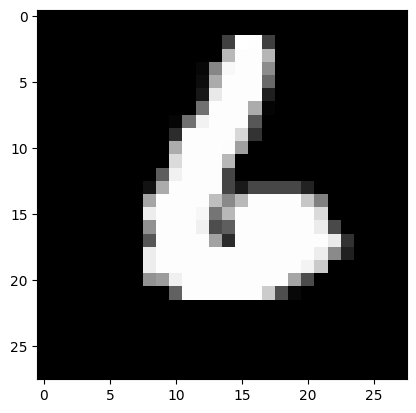

In [48]:
test_prediction(500, W1, b1, W2, b2)

In [49]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 8 7 8 8 4 4 7 6 1 6 0 3 2 2 5 4 5 7 4 5 2 4 7 4 0 0 0 9 4 0 0 4 8 6 7 0
 6 7 2 9 0 9 2 1 4 2 5 7 6 1 5 0 1 1 0 3 3 5 8 3 5 2 6 4 6 1 7 0 5 1 5 0 2
 0 8 0 8 2 0 8 2 0 1 2 4 5 9 7 0 8 1 5 9 7 7 8 8 9 5 6 0 3 5 1 9 3 6 7 1 2
 1 7 3 1 1 9 1 7 2 7 8 2 3 7 9 4 0 6 2 4 4 7 3 8 4 9 9 1 3 6 5 0 9 5 3 9 0
 2 8 3 8 1 6 1 3 2 4 3 0 7 4 5 3 9 4 4 1 0 3 1 3 3 4 4 7 3 1 9 1 1 6 6 7 5
 3 8 5 0 1 4 6 2 2 3 3 6 1 5 1 5 9 6 9 2 2 2 8 5 3 6 8 0 5 1 2 0 6 0 8 4 7
 1 6 3 8 3 7 6 5 9 4 7 6 0 2 9 4 5 6 1 7 1 2 2 8 8 6 3 1 1 4 4 5 0 8 1 5 1
 5 1 7 2 0 0 8 1 2 4 2 4 2 0 5 0 2 1 1 7 9 5 5 6 1 8 3 1 8 7 4 3 4 0 2 5 4
 0 5 3 7 4 8 1 0 7 7 6 7 0 5 4 7 8 1 0 7 8 6 4 5 2 2 7 8 7 9 1 6 4 7 6 7 8
 0 6 3 0 3 6 1 2 4 5 9 8 8 5 4 5 1 3 0 2 6 7 8 6 9 1 5 5 2 3 3 6 5 3 2 7 0
 6 6 0 1 3 8 9 7 8 5 8 4 7 5 0 1 1 3 4 1 1 6 9 7 6 7 0 1 7 6 3 8 9 7 1 5 7
 3 7 1 5 4 8 4 5 1 8 3 8 7 9 9 5 1 4 3 0 3 4 2 5 5 2 4 2 2 5 7 1 8 3 3 5 2
 7 1 8 4 2 2 3 1 3 5 7 1 4 4 1 3 7 4 4 7 6 4 6 2 4 1 2 8 9 6 5 5 4 3 2 4 4
 0 3 6 4 7 9 3 8 4 7 7 7 

0.902

~Cross_Validation test accuracy of 90% 🏆